# Loan Prediction Based on Customer Behavior

## Source and Link:
<p> The dataset belongs to a Hackathon organized by "Univ.AI"!! </p>

<b>[Loan Prediction Based on Customer Behavior](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior)</b>

<b>[Project Documentation Link](https://drive.google.com/drive/folders/1nitMIykLinFD7geLrAWNRR4Hqrb9Mxpf?usp=sharing)</b>

## Problem Definition:
<p> The goal of an organization is to foresee potential customers who may default on their loans by using past behavior data of their customers. By doing so, they intend to estimate the likelihood of new customers becoming at risk or not. <br>
All the date were provided at the time of the loan application.
</p>

## Feature Description:


| Feature | Description | Data Type |
| :--------|:-------------|:-----------:|
| ID   | ID of the cutomer |  Numeric  |
| Income| Income of the cutomer|  Numeric     |
| Age|Age of the cutomer|    Numeric   |
| Experience| Professional experience of the cutomer in years|   Numeric     |
| Married/Single|Marital status of the cutomer|    String     |
| House_Ownership| Does the customer Own or rent or neither|   String        |
| Car_Ownership| Does the customer own a car|   String        |
| Profession| Job of the cutomer|    String       |
| CITY| City of residence |       String    |
| STATE|State of residence|      String     |
| current_job_years	| Years of experience in the current job |    Numeric       |
| current_house_years| Number of years in the current house	|    Numeric       |
| Risk_Flag| Defaulted on a loan or not in the past|       Numeric    |

## 1. The necessary Libraries

In [1]:
# libray for managing warnings
import warnings

# pandas and numpy for data manipulation & numerical computations
import pandas as pd
import numpy as np

# seaborn and matplotlip for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libirary imports for preprocessing, modeling, and model eavluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# display plot in the same cell
%matplotlib inline

# display max df columns
pd.set_option('display.max_columns', None)

# setting the seaborn style
sns.set(style="darkgrid")

# ignore warnings
warnings.filterwarnings('ignore')

## 2. Load the data set

In [2]:
df = pd.read_csv('modified_loan_data.csv')

In [3]:
# first 5 rows
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834.0,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13.0,0
1,2,7574516.0,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13.0,0
2,3,3991815.0,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10.0,0
3,4,6256451.0,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12.0,1
4,5,5768871.0,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14.0,1


In [4]:
# last 5 rows
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
264595,71094,422892.0,59,7,single,rented,yes,Biomedical_Engineer,Satara,Maharashtra,7,10.0,1
264596,167443,1122270.0,72,11,single,rented,no,Librarian,Cuttack,Odisha,5,12.0,0
264597,187835,5734542.0,32,12,single,rented,no,Software_Developer,Unnao,Uttar_Pradesh,5,13.0,0
264598,109076,NaN,39,6,single,rented,no,Software_Developer,Ongole,Andhra_Pradesh,6,12.0,0
264599,27931,7334048.0,58,9,single,rented,no,Chemical_engineer,Bhilai,Chhattisgarh,8,10.0,0


## 3. Data Checks
This section for checking the size of the data set, outliers, missing values, and duplicates.

In [5]:
# shape 
df.shape

(264600, 13)

In [6]:
# data types
df.dtypes

Id                     int64
Income               float64
Age                    int64
Experience             int64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CITY                  object
STATE                 object
CURRENT_JOB_YRS        int64
CURRENT_HOUSE_YRS    float64
Risk_Flag              int64
dtype: object

In [7]:
# check missing values 
# percentage of missing values in each column
total_missing = df.isnull().sum().sort_values(ascending = False)
missing_percent = (total_missing / len(df)) * 100
table = pd.concat([total_missing,missing_percent], axis=1, keys=['Total','Percentage %'])
table

,Total,Percentage %
Income,10623,4.014739
Married/Single,7692,2.907029
CURRENT_HOUSE_YRS,5326,2.012850
Car_Ownership,5314,2.008314
Id,0,0.000000
Age,0,0.000000
Experience,0,0.000000
House_Ownership,0,0.000000
Profession,0,0.000000
CITY,0,0.000000


In [8]:
# Check Duplicates
total_dupliactes = df.duplicated().sum()
dupliactes_percent = (total_dupliactes / len(df)) * 100
table = pd.DataFrame({'Total':[total_dupliactes],'Percentage %':[dupliactes_percent]})
table

,Total,Percentage %
0,12600,4.761905


In [9]:
# check outliers
def outliers(df):
    #  first and third quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR
    IQR = Q3 - Q1
    
    out = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    
    return out

In [10]:
# total number of outliers in each features

total = []
for col in df.columns[[1,2,3,10,11]]:
    total.append(len(outliers(df[col])))


# data frame to display total number of outliers in each features

outlier_df = pd.DataFrame(
    data = {'Features' : df.columns[[1,2,3,10,11]], 
          'Total Outliers' : total}).set_index('Features')
outlier_df

,Total Outliers
Features,
Income,0
Age,0
Experience,0
CURRENT_JOB_YRS,0
CURRENT_HOUSE_YRS,0


### Insights:
* There are 264600 observation and 13 column.
* There are categorical features need to be mapped before modeling.
* The data contain missing values in 4 features need to be handled.
* The data doesn't contain any outliers.
* The data contain duplicates appx 5% need to be handled.

## 4. Preprocessing 1

### 4.1 Duplicates

In [11]:
# dropping duplicates as they are not necessary for the analysis.
df.drop_duplicates(inplace=True)

In [12]:
# check duplicates
df.duplicated().sum()

0

### 4.2 Missing Values
* The mean is used to replace missing values in numerical columns, which is considered the optimal approach since there are no outliers.
* The mode is used to replace missing values in categorical columns.

In [13]:
# filling Income & CURRENT_HOUSE_YRS with mean
df['Income'].fillna(round(df['Income'].mean()), inplace=True)
df['CURRENT_HOUSE_YRS'].fillna(round(df['CURRENT_HOUSE_YRS'].mean()), inplace=True)

In [14]:
# filling Married/Single & Car_Ownership with mode
df['Married/Single'].fillna(df['Married/Single'].mode()[0], inplace=True)
df['Car_Ownership'].fillna(df['Car_Ownership'].mode()[0], inplace=True)

In [15]:
# check missing values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [16]:
# shape after cleaning
df.shape

(252000, 13)

## 5. Sampling
* Stratified random sampling is preferred because it reflects the data's distribution and avoids any potential bias.
* A sample of 55% has been taken from the population based on Risk Flag.

In [17]:
risk = df['Risk_Flag'].value_counts(normalize=True)
risk

0    0.877
1    0.123
Name: Risk_Flag, dtype: float64

In [18]:
sample_risk_0 = df[df['Risk_Flag'] == 0].sample(round((len(df)*0.55)*(risk[0])))
sample_risk_1 = df[df['Risk_Flag'] == 1].sample(round((len(df)*0.55)*(risk[1])))

In [19]:
sampled_df = pd.concat([sample_risk_0, sample_risk_1])
sampled_df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
172696,172697,7738866.0,70,6,single,rented,no,Graphic_Designer,Ramgarh,Jharkhand,6,12.0,0
227652,227653,7732819.0,54,8,single,rented,no,Microbiologist,Srinagar,Jammu_and_Kashmir,8,10.0,0
95768,95769,460547.0,70,20,single,rented,no,Software_Developer,Asansol,West_Bengal,4,12.0,0
89064,89065,3701293.0,62,20,single,rented,no,Physician,Tumkur,Karnataka,3,11.0,0
158516,158517,7257927.0,75,18,single,rented,no,Chef,Silchar,Assam,10,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216474,216475,3062302.0,30,3,single,rented,no,Designer,"Khora,_Ghaziabad",Uttar_Pradesh,3,10.0,1
60821,60822,8702383.0,76,20,single,rented,no,Surveyor,Mahbubnagar,Telangana,3,12.0,1
78355,78356,4783607.0,67,19,single,rented,no,Consultant,Howrah,West_Bengal,7,13.0,1
123314,123315,1369359.0,22,19,single,norent_noown,yes,Politician,Malda,West_Bengal,9,12.0,1


## 6. EDA
This section is divide into to parts:
* Summary statistics
* Visualization

To illustrate the distributions, relationships, and patterns in the data as well as getting insights.

### 6.1 Summary statistics:

In [20]:
# summary stats
sampled_df[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,1.386000e+05,138600.000000,138600.000000,138600.000000,138600.000000
mean,5.000360e+06,49.956775,10.081883,6.337330,11.996681
std,2.819461e+06,17.069516,6.001930,3.649305,1.384621
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.596508e+06,35.000000,5.000000,3.000000,11.000000
50%,4.996003e+06,50.000000,10.000000,6.000000,12.000000
75%,7.362882e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


<b>Insights:</b>
* avg income of the appliacnts is almost 5,000,00 
* avg age of the applicants is almost 50 
* avg years of experience the applicants is 10 yrs
* avg job years of the applicants is almost 6 years
* avg current house years of the applicants is almost 12 yrs

### 6.2 Visualization

#### 6.2.1 Univariate analysis

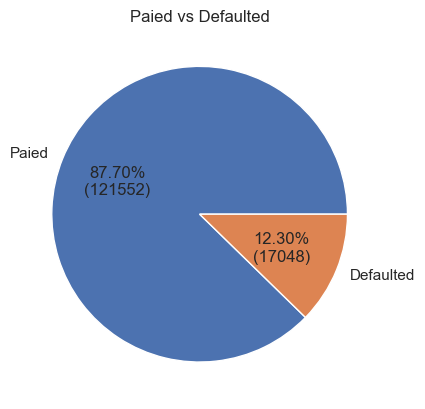

In [21]:
# count number of Defaulted and not
risk = sampled_df['Risk_Flag'].value_counts()

# visualize using pie chart
plt.pie(risk, labels = ["Paied","Defaulted"], autopct=lambda x:'{:.2f}%\n({:.0f})'.format(x, risk.sum()*x/100))
plt.title("Paied vs Defaulted")
plt.show()

<b> Insights: </b>
* Most of the applicates haven't been defaulted before as only 12.3% of the have been defaulted.

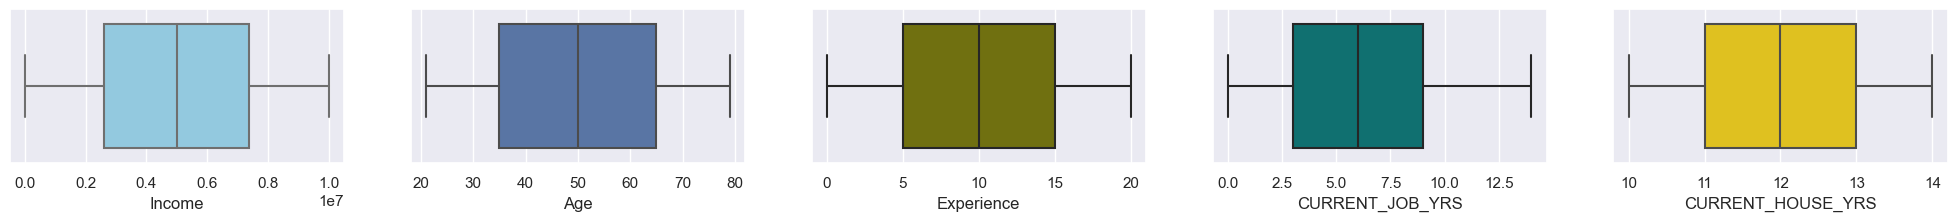

In [22]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,5, figsize=(25, 2))

# inti a number of box plots
sns.boxplot(data=sampled_df, x='Income', color="skyblue", ax=axs[0])
sns.boxplot(data=sampled_df, x='Age', ax=axs[1])
sns.boxplot(data=sampled_df, x='Experience', color="olive", ax=axs[2])
sns.boxplot(data=sampled_df, x='CURRENT_JOB_YRS', color="teal", ax=axs[3])
sns.boxplot(data=sampled_df, x='CURRENT_HOUSE_YRS', color="gold", ax=axs[4])

# Show the plot
plt.show()

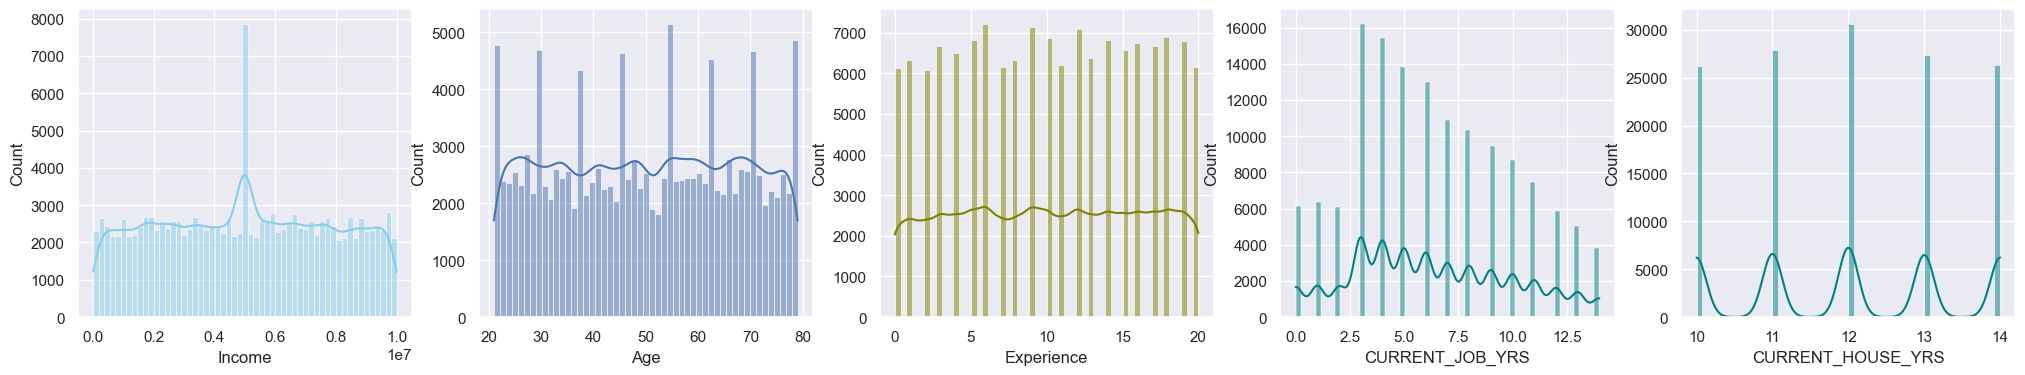

In [23]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,5, figsize=(25,4))

# inti a number of box plots
sns.histplot(data=sampled_df['Income'], kde=True, ax=axs[0], color="skyblue")
sns.histplot(data=sampled_df['Age'], kde=True, ax=axs[1])
sns.histplot(data=sampled_df['Experience'], kde=True, ax=axs[2], color="olive")
sns.histplot(data=sampled_df['CURRENT_JOB_YRS'], kde=True, ax=axs[3], color="teal")
sns.histplot(data=sampled_df['CURRENT_HOUSE_YRS'], kde=True, ax=axs[4], color="teal")

# Show the plot
plt.show()

In [24]:
sampled_df[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']].skew()

Income               0.003204
Age                 -0.007274
Experience          -0.013683
CURRENT_JOB_YRS      0.271056
CURRENT_HOUSE_YRS    0.006332
dtype: float64

<b>Insights:</b>
* There are no outliers.
* The distribution of the data is appx symmetric there is no need for transformation.

#### 6.2.2 Bivariate analysis

##### Risk by Income and Age

In [25]:
# split by avg income
df_2 = sampled_df.copy()
df_2['Income'] = df_2['Income'].map(lambda x:'>=5M' if x >= 5000000 else '<5M')

# split by avg age
df_2['Age'] = df_2['Age'].map(lambda x:'>=50' if x >= 50 else '<50')

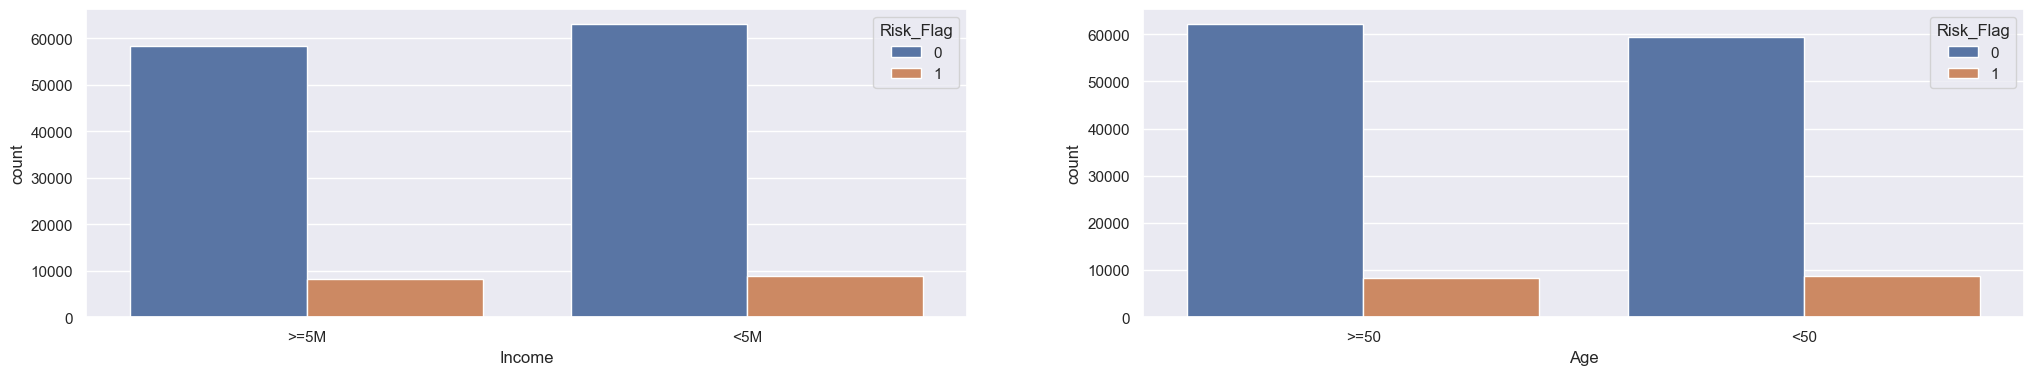

In [26]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(25, 4))

# inti a number of count plots
sns.countplot(data=df_2, x = "Income", hue="Risk_Flag", ax = axs[0])
sns.countplot(data=df_2, x = "Age", hue="Risk_Flag", ax = axs[1])

# Show the plot
plt.show()

<b>Insights:</b>
* Applicants above the avg Age and Income have slightly lower risk of being defaulted compared to Applicants below the avg.

##### Risk by  Experience, Job, House years.

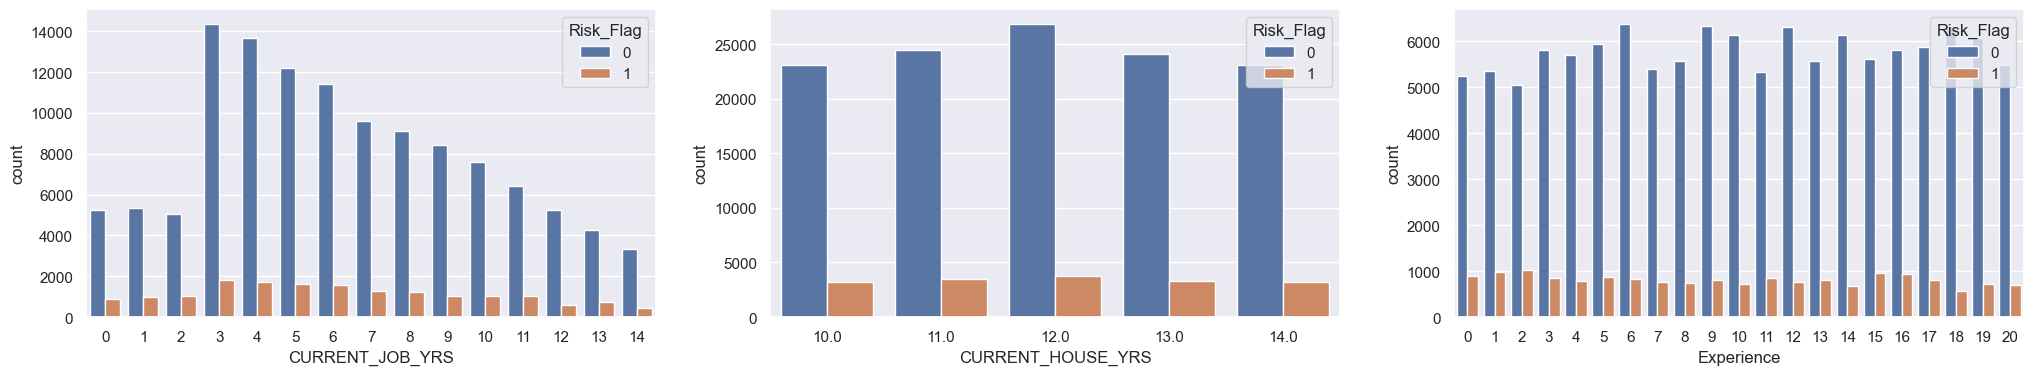

In [27]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,3, figsize=(25, 4))

# inti a number of count plots
sns.countplot(data=df_2, x = "CURRENT_JOB_YRS", hue="Risk_Flag", ax = axs[0])
sns.countplot(data=df_2, x = "CURRENT_HOUSE_YRS", hue="Risk_Flag", ax = axs[1])
sns.countplot(data=df_2, x = "Experience", hue="Risk_Flag", ax = axs[2])

# Show the plot
plt.show()

**Insights:**


* Applicates who sepnd more years in their jobs are less likely to default.
* Applicates who are less experieced are more likely to default.
* Applicates who live 10 yrs or more in the same house have low level of loan default.


##### Risk by Marital status, car, House ownership.

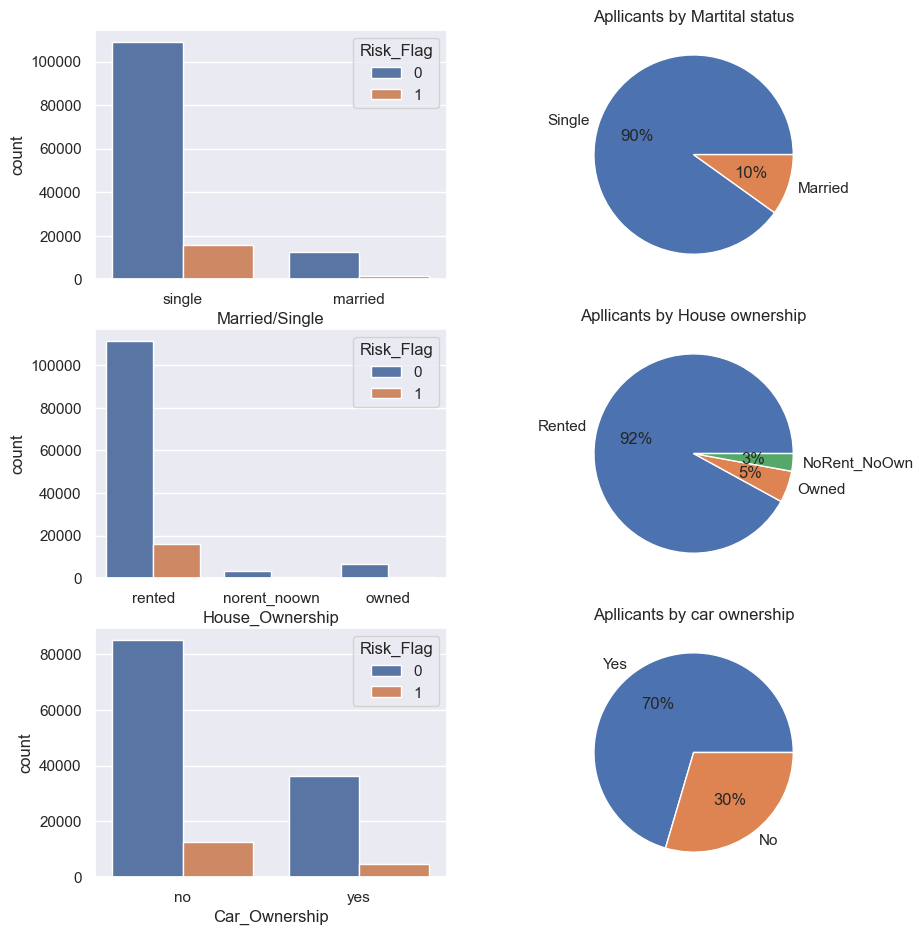

In [28]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(3,2, figsize=(10, 11))

# inti a number of count plots and pie plots
sns.countplot(data = df_2, x = 'Married/Single', hue = "Risk_Flag", ax = axs[0,0])
axs[0,1].pie(df['Married/Single'].value_counts(), labels = ["Single","Married"], autopct='%1.f%%')
axs[0,1].set_title('Apllicants by Martital status')

sns.countplot(data = df_2, x = 'House_Ownership', hue = "Risk_Flag", ax = axs[1,0])
axs[1,1].pie(df['House_Ownership'].value_counts(), labels = ["Rented","Owned","NoRent_NoOwn"], autopct='%1.f%%')
axs[1,1].set_title('Apllicants by House ownership')


sns.countplot(data = df_2, x = 'Car_Ownership',  hue = "Risk_Flag", ax = axs[2,0])
axs[2,1].pie(df['Car_Ownership'].value_counts(), labels = ["Yes","No"], autopct='%1.f%%')
axs[2,1].set_title('Apllicants by car ownership')

# Show the plot
plt.show()

**Insights:**

1.   Single customers ask more for loans and at higher risk to default.
2.   Customers who rent ask more for loans and at higher risk to default.
3.   Non-car owner customers ask less for loans but at higher risk to default.



##### Risk by Profession, City, State.

In [29]:
len(df['Profession'].unique())

51

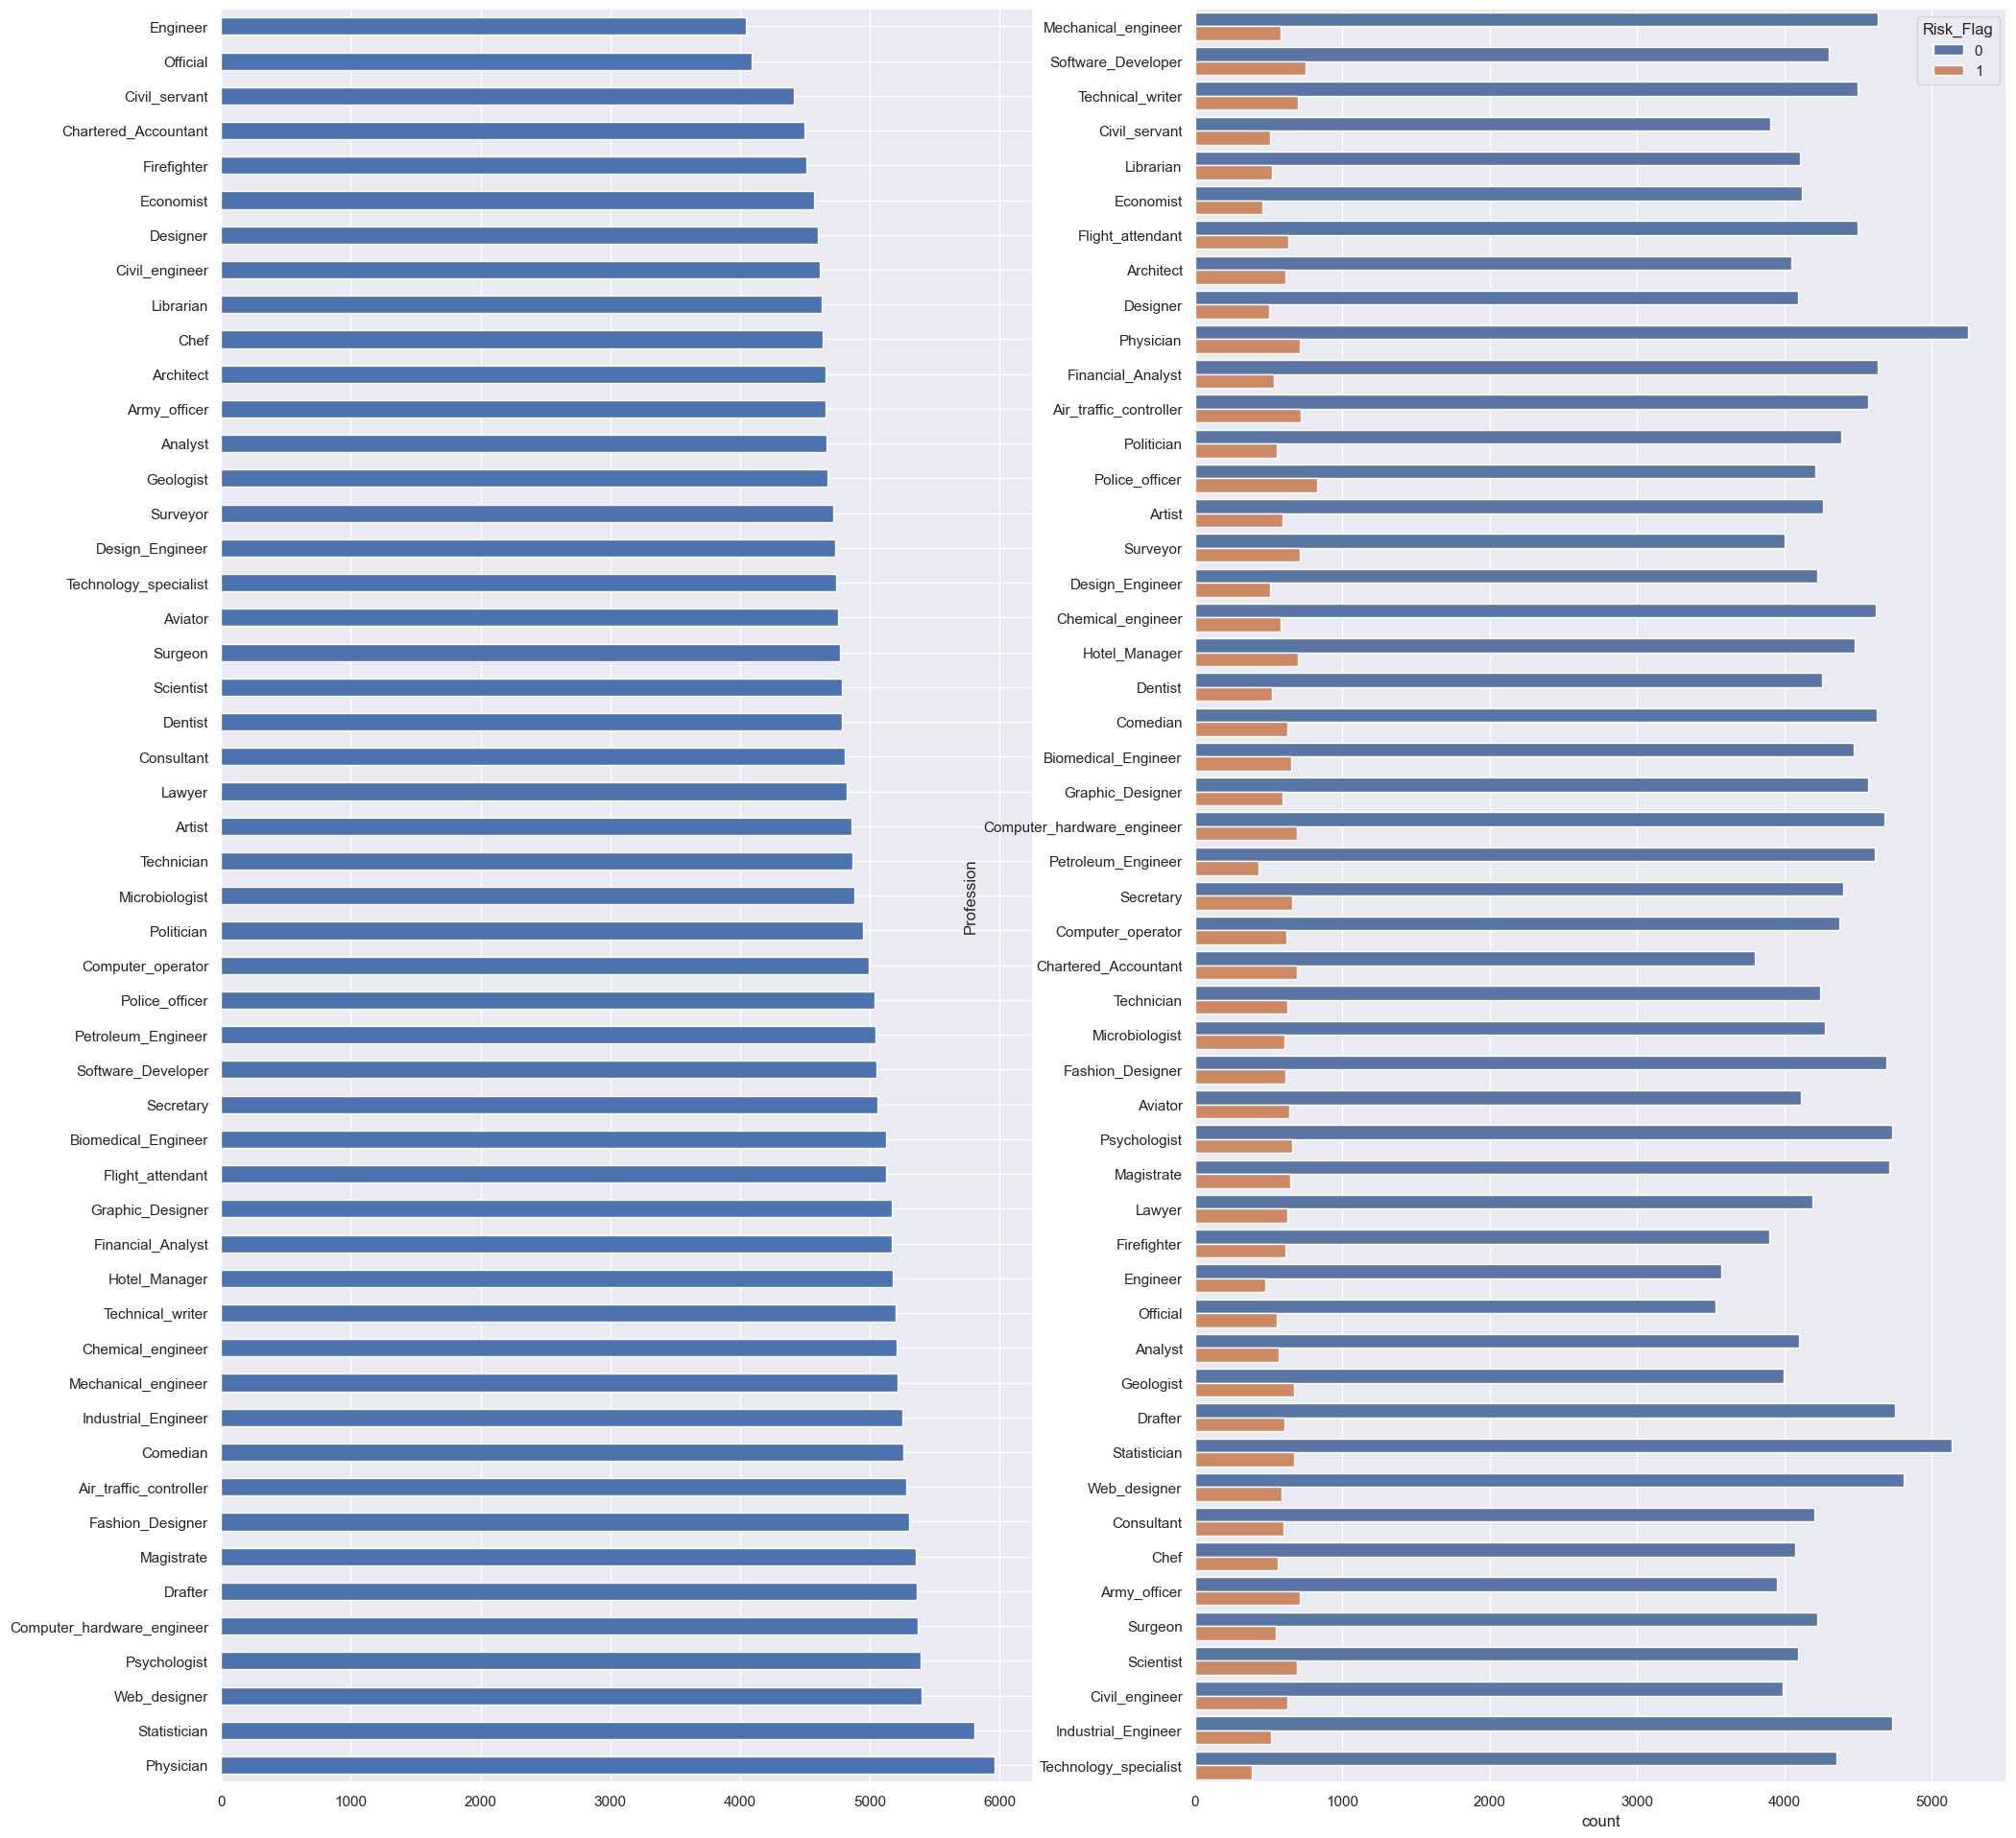

In [30]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(24, 24))

# inti a number of count plots and barPlot
df['Profession'].value_counts().plot(kind='barh',ax=axs[0])
sns.countplot(y="Profession", data=df, hue='Risk_Flag',ax = axs[1])

# Show the plot
plt.show()

In [31]:
pd.crosstab(df['Profession'], df['Risk_Flag'], margins=True).sort_values(by=1, ascending=False).head()

Risk_Flag,0,1,All
Profession,,,
All,221004,30996,252000
Police_officer,4209,826,5035
Software_Developer,4303,750,5053
Air_traffic_controller,4566,715,5281
Surveyor,4000,714,4714


In [32]:
pd.crosstab(df['Profession'], df['Risk_Flag'], margins=True).sort_values(by=0, ascending=False).head()

Risk_Flag,0,1,All
Profession,,,
All,221004,30996,252000
Physician,5247,710,5957
Statistician,5135,671,5806
Web_designer,4808,589,5397
Drafter,4754,605,5359


**Insight:**

* There are 51 Profession.
* Physicians are the most to get loans.
* Police officers are the most to default.



In [33]:
len(df['STATE'].unique())

29

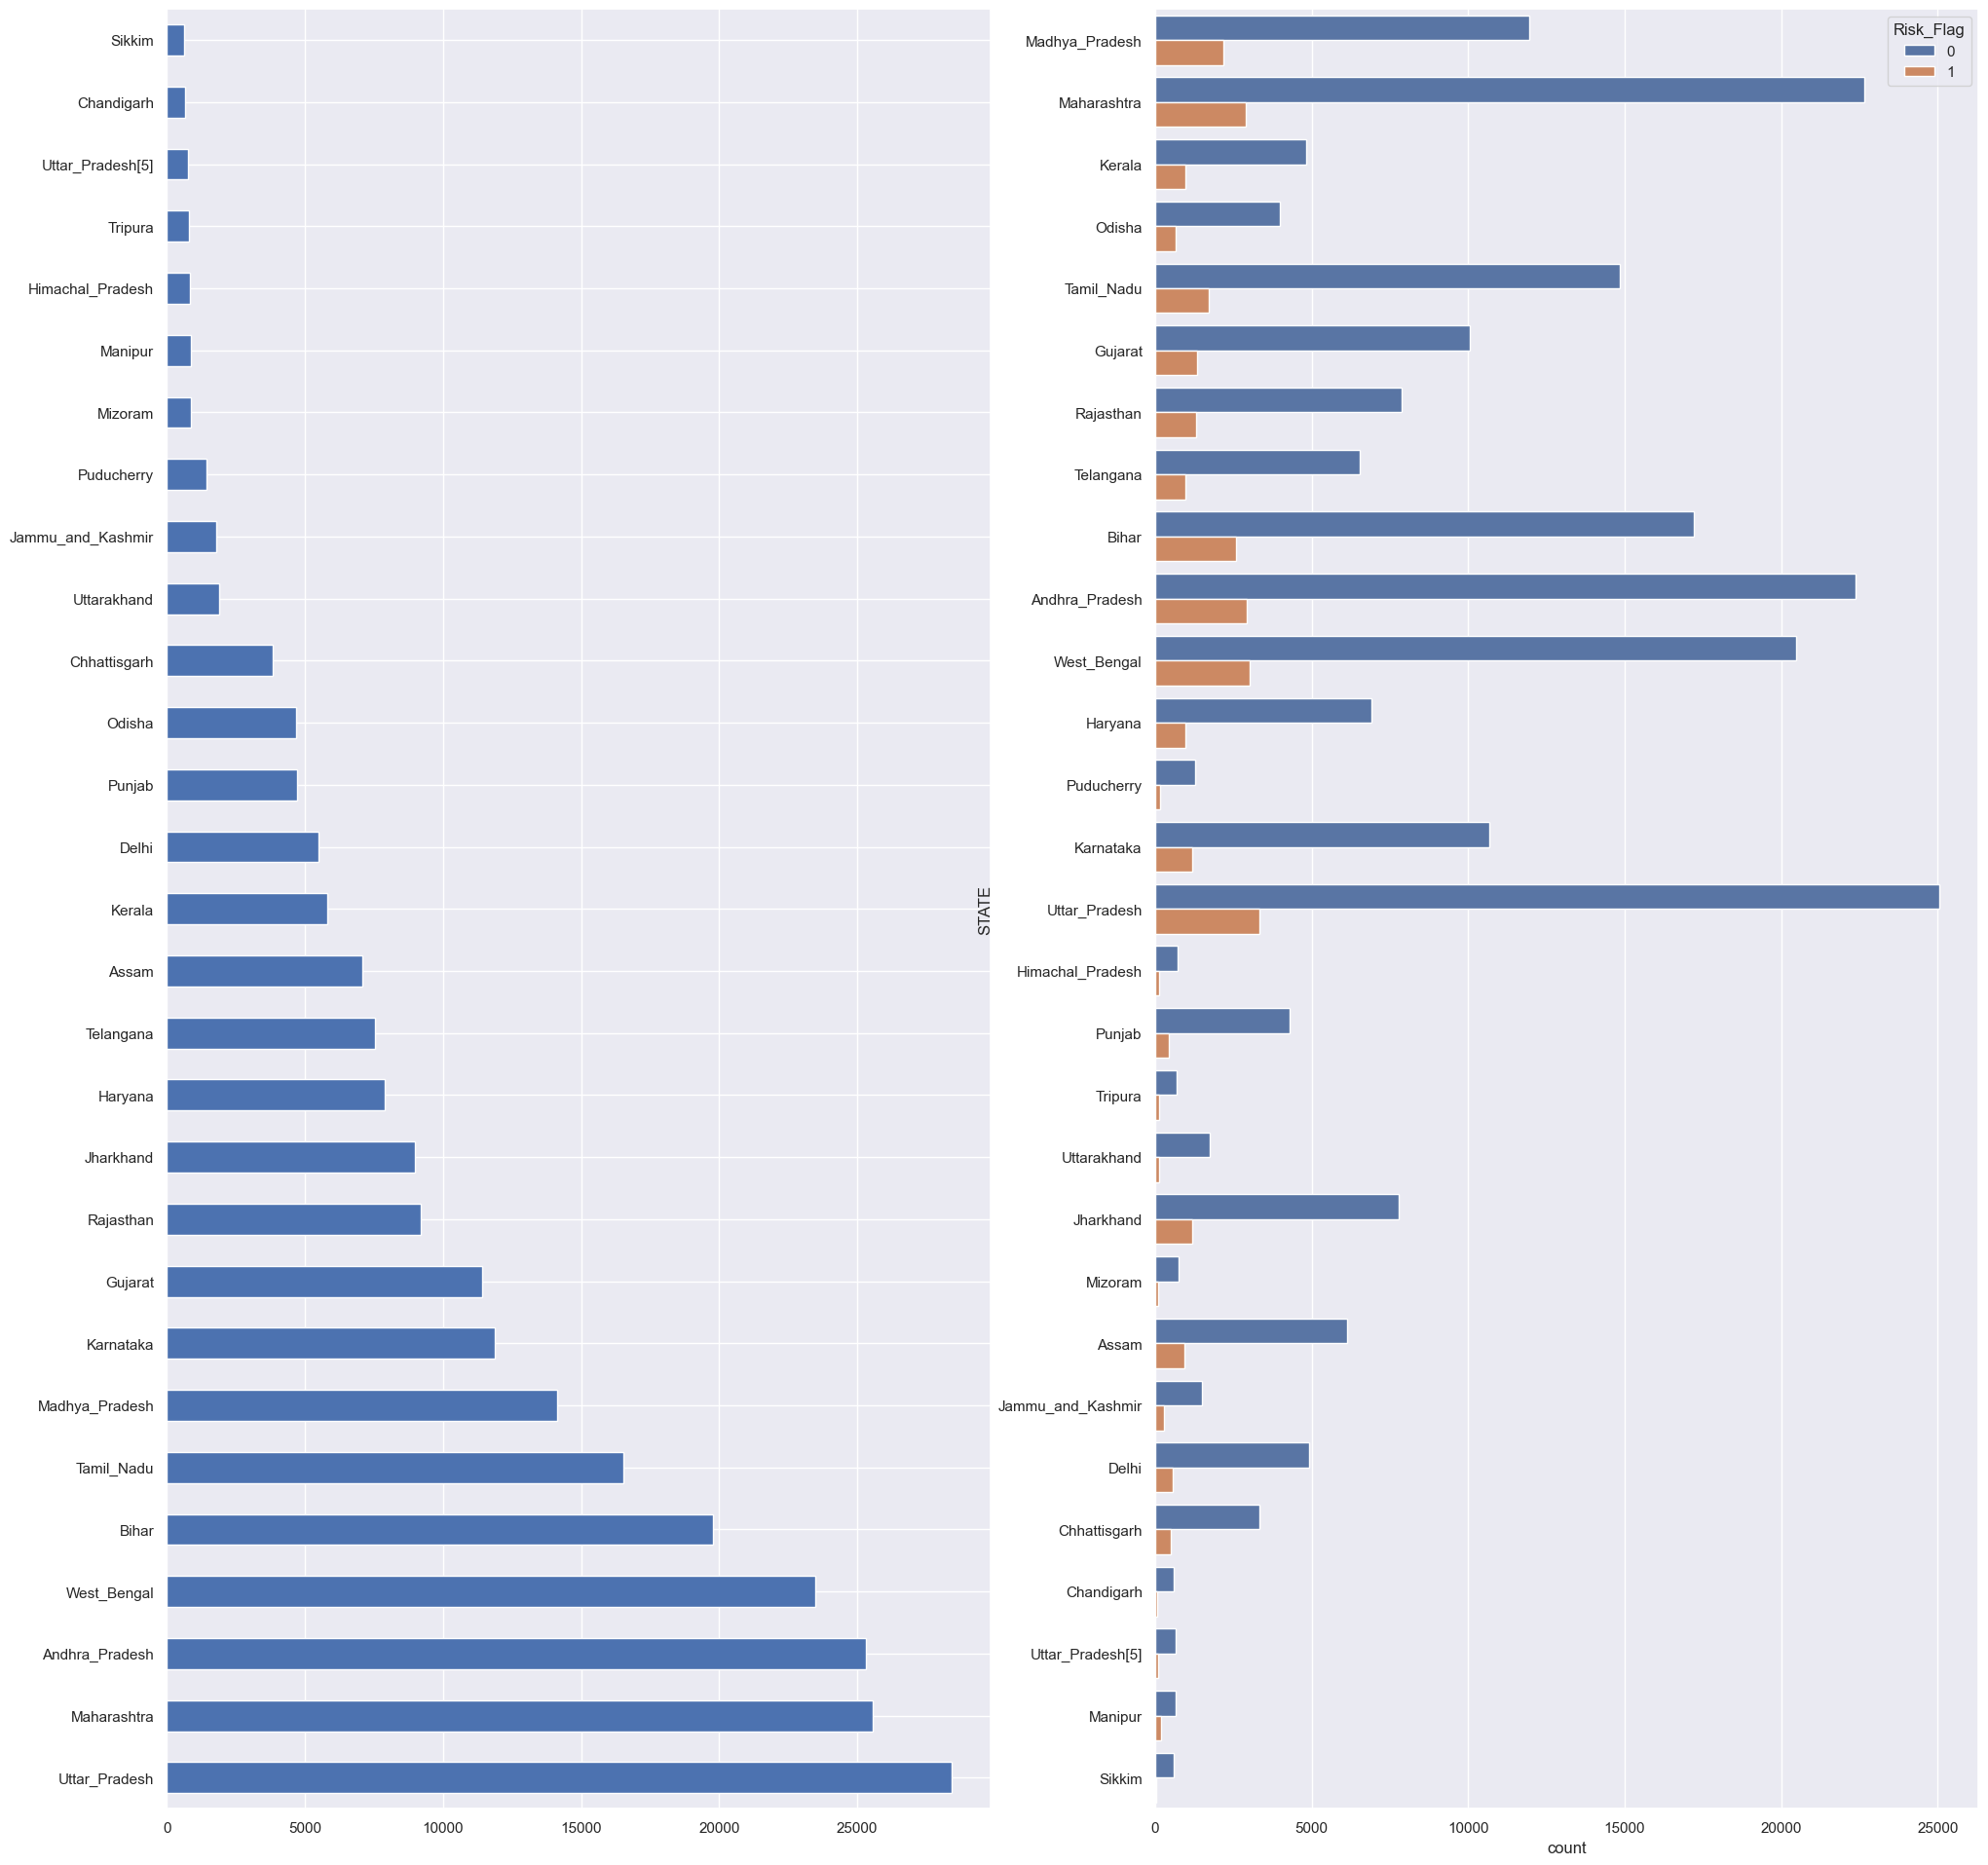

In [34]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(24, 24))

# inti a number of count plots and barPlot
df['STATE'].value_counts().plot(kind='barh',ax=axs[0])
sns.countplot(y="STATE", data=df, hue='Risk_Flag',ax = axs[1])

# Show the plot
plt.show()

In [35]:
pd.crosstab(df['STATE'], df['Risk_Flag'], margins=True).sort_values(by=1, ascending=False).head()

Risk_Flag,0,1,All
STATE,,,
All,221004,30996,252000
Uttar_Pradesh,25057,3343,28400
West_Bengal,20474,3009,23483
Andhra_Pradesh,22362,2935,25297
Maharashtra,22667,2895,25562


In [36]:
pd.crosstab(df['STATE'], df['Risk_Flag'], margins=True).sort_values(by=0, ascending=False).head()

Risk_Flag,0,1,All
STATE,,,
All,221004,30996,252000
Uttar_Pradesh,25057,3343,28400
Maharashtra,22667,2895,25562
Andhra_Pradesh,22362,2935,25297
West_Bengal,20474,3009,23483


<b> Insights: </b>
* The applicants come from 29 state.
* customers of **Uttar_Pradesh** are the most totake loans and default.

In [37]:
len(df['CITY'].unique())

317

In [38]:
pd.crosstab(df['CITY'], df['Risk_Flag'], margins=True).sort_values(by=0, ascending=False).head()

Risk_Flag,0,1,All
CITY,,,
All,221004,30996,252000
Vijayanagaram,1110,149,1259
Saharsa[29],1067,113,1180
Bulandshahr,1061,124,1185
Bhopal,1042,166,1208


In [39]:
pd.crosstab(df['CITY'], df['Risk_Flag'], margins=True).sort_values(by=1, ascending=False).head()

Risk_Flag,0,1,All
CITY,,,
All,221004,30996,252000
Kochi,718,243,961
Satna,796,232,1028
Buxar[37],757,228,985
Srinagar,920,216,1136


**Insights:**

* There are 317 the applicants live in.
* Customers of Kochi city the most to default loans
* Customers of Vijayanagaram city the most to ask for loans



##### Realtionship between the variables.

In [40]:
# drop Id
df_2 = df_2.drop(['Id'],axis=1)

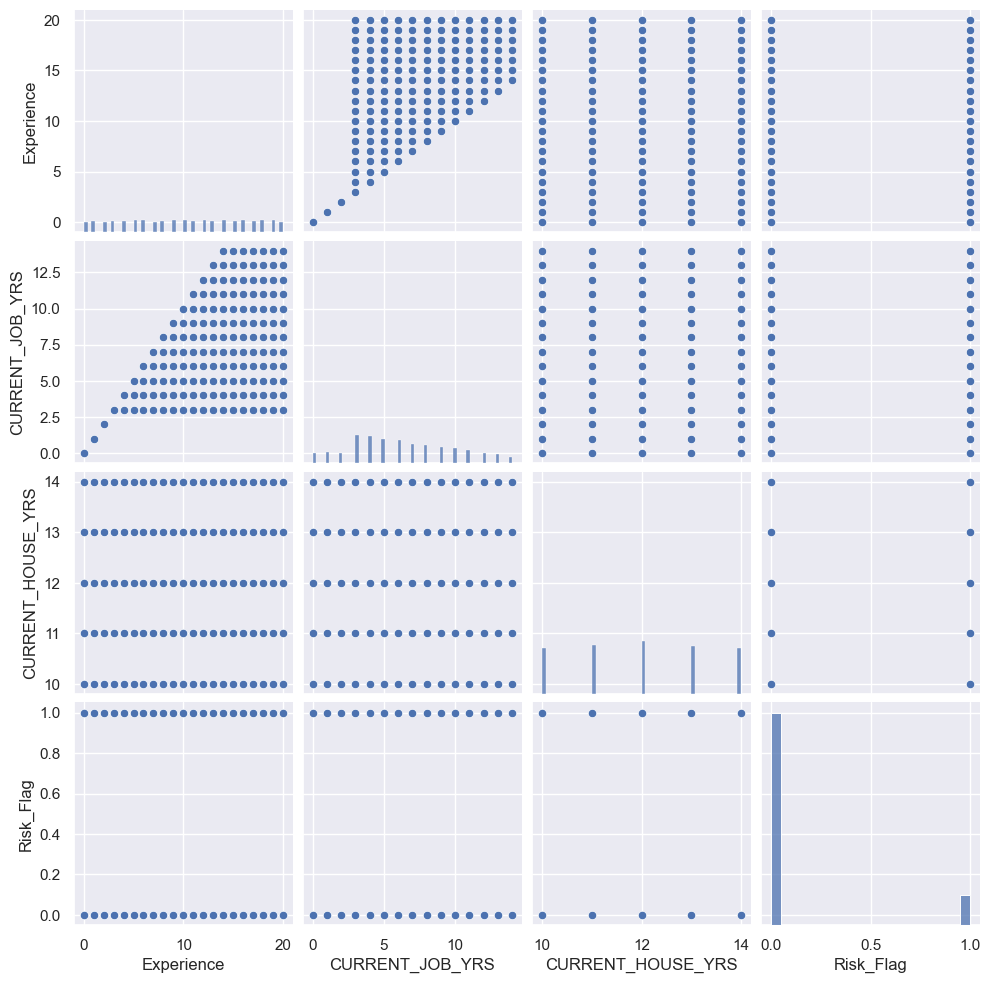

In [41]:
# pair plot
sns.pairplot(df_2)

# show the plt
plt.show()

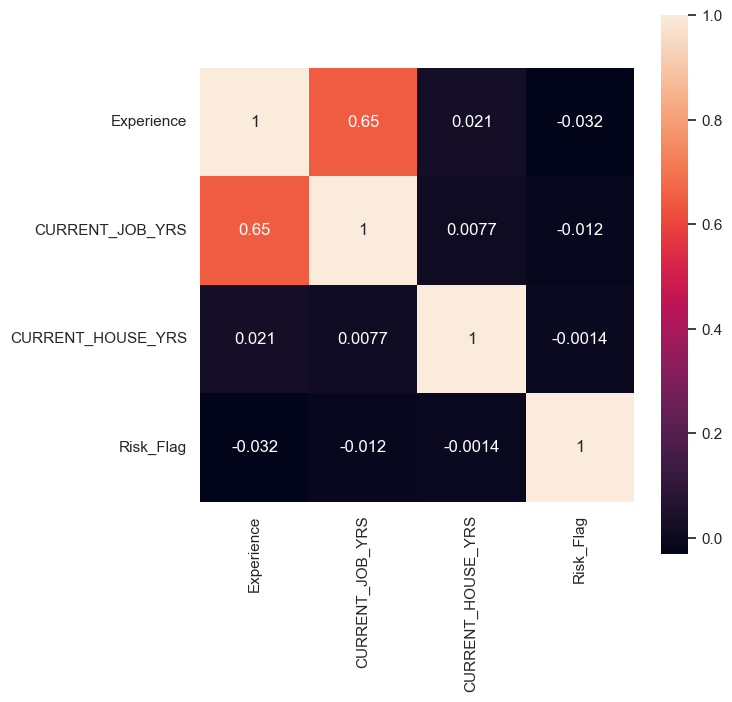

In [42]:
# calculate the correlation among the variables
corr = df_2.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(7, 7))

# Create a heatmap using Seaborn
sns.heatmap(corr, annot=True, square=True)

# Show the plot
plt.show()

<b>Insights:</b>
* Since a correlation greater than 0.7 is generally considered high, the moderate correlation observed between Experience and CURRENT_JOB_YRS suggests that the two variables are positively related but not strongly so, dropping one of them might help the model for better prediction.

## 7. Preprocessing 2

### 7.1 Drop High correlated Feature

In [43]:
df_2 = df_2.drop(['Experience'],axis=1)
df_2

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
172696,>=5M,>=50,single,rented,no,Graphic_Designer,Ramgarh,Jharkhand,6,12.0,0
227652,>=5M,>=50,single,rented,no,Microbiologist,Srinagar,Jammu_and_Kashmir,8,10.0,0
95768,<5M,>=50,single,rented,no,Software_Developer,Asansol,West_Bengal,4,12.0,0
89064,<5M,>=50,single,rented,no,Physician,Tumkur,Karnataka,3,11.0,0
158516,>=5M,>=50,single,rented,no,Chef,Silchar,Assam,10,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...
216474,<5M,<50,single,rented,no,Designer,"Khora,_Ghaziabad",Uttar_Pradesh,3,10.0,1
60821,>=5M,>=50,single,rented,no,Surveyor,Mahbubnagar,Telangana,3,12.0,1
78355,<5M,>=50,single,rented,no,Consultant,Howrah,West_Bengal,7,13.0,1
123314,<5M,<50,single,norent_noown,yes,Politician,Malda,West_Bengal,9,12.0,1


### 7.2 Feature Encoding

In [44]:
# label encoding
features = ['Income', 'Age', 'Married/Single', 'Car_Ownership' ,'House_Ownership', 'Profession', 'CITY', 'STATE']

lable = LabelEncoder()

for feature in features:
    df_2[feature] = lable.fit_transform(df_2[feature])
    
df_2

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
172696,1,1,1,2,0,27,246,10,6,12.0,0
227652,1,1,1,2,0,34,281,9,8,10.0,0
95768,0,1,1,2,0,43,23,28,4,12.0,0
89064,0,1,1,2,0,37,301,11,3,11.0,0
158516,1,1,1,2,0,8,271,1,10,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...
216474,0,0,1,2,0,18,157,25,3,10.0,1
60821,1,1,1,2,0,46,179,23,3,12.0,1
78355,0,1,1,2,0,15,121,28,7,13.0,1
123314,0,0,1,0,1,39,181,28,9,12.0,1


### 7.3 Feature Scaling

In [45]:
# min-max scaling
scaler = MinMaxScaler()
df_2[df_2.columns] = scaler.fit_transform(df_2[df_2.columns])
df_2

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
172696,1.0,1.0,1.0,1.0,0.0,0.54,0.778481,0.357143,0.428571,0.50,0.0
227652,1.0,1.0,1.0,1.0,0.0,0.68,0.889241,0.321429,0.571429,0.00,0.0
95768,0.0,1.0,1.0,1.0,0.0,0.86,0.072785,1.000000,0.285714,0.50,0.0
89064,0.0,1.0,1.0,1.0,0.0,0.74,0.952532,0.392857,0.214286,0.25,0.0
158516,1.0,1.0,1.0,1.0,0.0,0.16,0.857595,0.035714,0.714286,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...
216474,0.0,0.0,1.0,1.0,0.0,0.36,0.496835,0.892857,0.214286,0.00,1.0
60821,1.0,1.0,1.0,1.0,0.0,0.92,0.566456,0.821429,0.214286,0.50,1.0
78355,0.0,1.0,1.0,1.0,0.0,0.30,0.382911,1.000000,0.500000,0.75,1.0
123314,0.0,0.0,1.0,0.0,1.0,0.78,0.572785,1.000000,0.642857,0.50,1.0


## 8. Modelling

### 6.1 Data Spliting

In [46]:
indep_vars = df_2.loc[:, df_2.columns != 'Risk_Flag']
target_var = df_2['Risk_Flag']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(indep_vars, target_var, test_size = 0.2, random_state = 0)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 110880
Test size: 27720


### 6.2 Logistic Regression Model

In [48]:
weights = {0:1, 1:7}

pipe = Pipeline([
    ('pca', PCA()),
    ('tree', LogisticRegression(class_weight=weights))
])

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)

#### 6.2.1 Model Evaluation 

In [49]:
model_acc = (accuracy_score(prediction, y_test)) * 100
model_f1 = (f1_score(prediction, y_test)) * 100
model_auc = (roc_auc_score(prediction, y_test)) * 100

In [50]:
ev = pd.DataFrame({'Metric':['Accurracy'],
             'Value':[model_acc]}).set_index('Metric')
ev

,Value
Metric,
Accurracy,52.323232


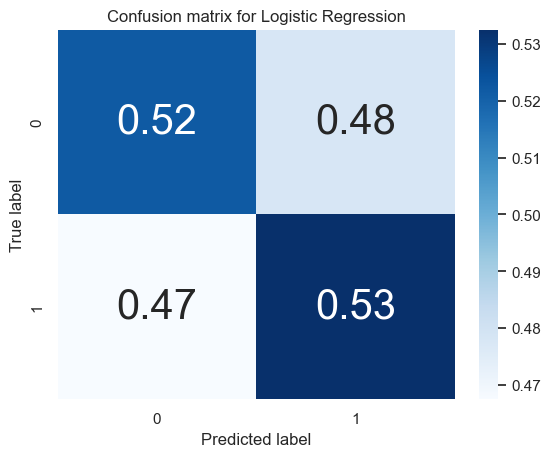

In [51]:
cm = confusion_matrix(y_test, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

<b>Result:</b> <br>
According to the metrics used for evaluation, it appears that the model is not performing well on the dataset. This is likely due to an imbalance in the distribution of the target variable, where only a small percentage (12.3%) of applicants are classified as having a "Risk_Flag" (defaulted), while the majority (87.7%) are classified as not having a risk flag. Using the weighted loss functions and PCA did not result in a significant improvement in the model's performance.

<b>Possible approaches to address the issue:</b>
* Using techniques such as oversampling, undersampling.
* Feature engineering.
* Using other models such as decision trees, and random forests as it seems that Logistic Regression isn't the best for the dataset.

### 6.3 Decision Tree Model

#### 6.3.1 UnderSampling

In [52]:
undersampler = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

#### 6.3.2 The Model

In [53]:
pipe = Pipeline([
    ('pca', PCA()),
    ('tree', DecisionTreeClassifier())
])

pipe.fit(X_train_resampled, y_train_resampled)
y_pred = pipe.predict(X_test)

#### 6.3.3 Model Evaluation

In [54]:
model_acc = (accuracy_score(y_pred, y_test)) * 100
model_auc = (roc_auc_score(y_pred, y_test)) * 100

In [55]:
ev = pd.DataFrame({'Metric':['Accurracy'],
             'Value':[model_acc]}).set_index('Metric')
ev

,Value
Metric,
Accurracy,81.468254


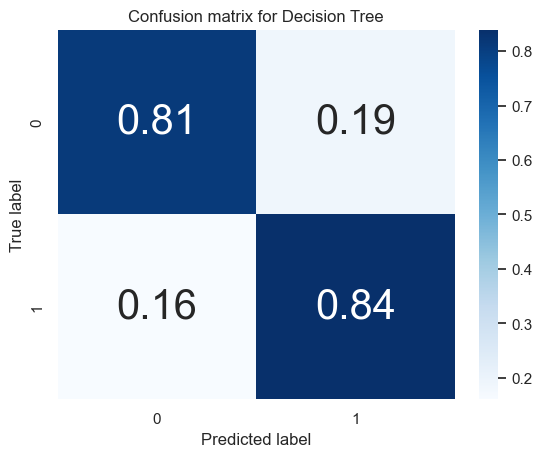

In [56]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Decision Tree')
plt.show()

<b>Result:</b> <br>
While the Decision Tree Model outperforms the Logistic Regression Model in terms of accuracy and the confusion matrix, it's not be the best result for this dataset. Other techniques or approaches could potentially help to achieve even better accuracy such as ensemble methods or Using a different algorithm.